In [37]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adam, Adagrad
from keras import optimizers
from keras.regularizers import l2, l1
from keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

## Load heart data

In [2]:
data = pd.read_csv('heart.txt')
data = data.dropna()

data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


## Pre-process data

In [3]:
# One-hot encoding of categorical attributes
x = data.ix[:,1:-1]
x = pd.get_dummies(x).as_matrix()

# Obtain labels and encode as {0, 1}
y = data.ix[:,-1]
y = (y=='Yes').as_matrix()*1.0

# Normalize features
x = (x - x.mean(axis=0)) / x.std(axis=0)

# Split train-test sets
n = x.shape[0]
perm = np.random.permutation(n)
n_tr = int(np.round(n*0.5))

x_train = x[perm[0:n_tr],:]
y_train = y[perm[0:n_tr]]

x_test = x[perm[n_tr:],:]
y_test = y[perm[n_tr:]]

## SGD with Momentum

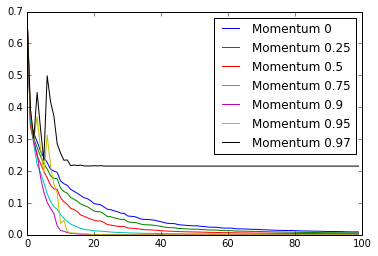

In [27]:
mom_val = [0,0.25,0.5,0.75,0.9,0.95,0.97]

for i in range(0, len(mom_val)):  
    np.random.seed(10)
    
    # Construct neural network model
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=(x_train.shape[1],))) # hidden layer
    model.add(Dense(1, activation='sigmoid')) # output layer

    # Optimizer: SGD (loss = binary cross entropy)
    sgd = SGD(lr=1, decay=1e-6, momentum=mom_val[i], nesterov=True)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

    # Fit neural network
    history = model.fit(x_train, y_train, epochs=100, batch_size=100, verbose=0)
    plt.plot(history.history['loss'], label='Momentum '+str(mom_val[i]))

plt.legend()

Also see: https://distill.pub/2017/momentum/

## Adaptive Learning Rate

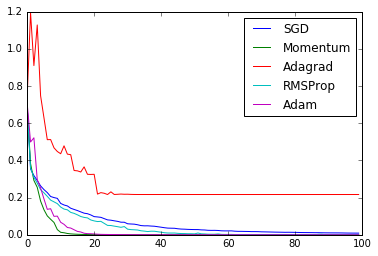

In [41]:
##
# SGD
np.random.seed(10)
    
# Construct neural network model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(x_train.shape[1],))) # hidden layer
model.add(Dense(1, activation='sigmoid')) # output layer

# Optimizer: SGD (loss = binary cross entropy)
sgd = SGD(lr=1, decay=1e-6, momentum=0, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit neural network
history = model.fit(x_train, y_train, epochs=100, batch_size=100, verbose=0)
plt.plot(history.history['loss'], label='SGD')

##
# SGD with momentum=0.9
np.random.seed(10)
    
# Construct neural network model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(x_train.shape[1],))) # hidden layer
model.add(Dense(1, activation='sigmoid')) # output layer

# Optimizer: SGD (loss = binary cross entropy)
sgd = SGD(lr=1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit neural network
history = model.fit(x_train, y_train, epochs=100, batch_size=100, verbose=0)
plt.plot(history.history['loss'], label='Momentum')

##
# Adagrad
np.random.seed(10)
    
# Construct neural network model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(x_train.shape[1],))) # hidden layer
model.add(Dense(1, activation='sigmoid')) # output layer

# Optimizer: SGD(loss = binary cross entropy)
ada = Adagrad(lr=0.001, decay=1e-6)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# Fit neural network
history = model.fit(x_train, y_train, epochs=100, batch_size=100, verbose=0)
plt.plot(history.history['loss'], label='Adagrad')

plt.legend()

##
# RMSProp
np.random.seed(10)
    
# Construct neural network model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(x_train.shape[1],))) # hidden layer
model.add(Dense(1, activation='sigmoid')) # output layer

# Optimizer: SGD (loss = binary cross entropy)
rmsprop = RMSprop(lr=0.01, decay=1e-6)
model.compile(loss='binary_crossentropy', optimizer=rmsprop, metrics=['accuracy'])

# Fit neural network
history = model.fit(x_train, y_train, epochs=100, batch_size=100, verbose=0)
plt.plot(history.history['loss'], label='RMSProp')

plt.legend()

##
# Adam
np.random.seed(10)
    
# Construct neural network model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(x_train.shape[1],))) # hidden layer
model.add(Dense(1, activation='sigmoid')) # output layer

# Optimizer: SGD(loss = binary cross entropy)
adam = Adam(lr=0.1, decay=1e-6)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# Fit neural network
history = model.fit(x_train, y_train, epochs=100, batch_size=100, verbose=0)
plt.plot(history.history['loss'], label='Adam')

plt.legend()